In [16]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import SGDClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import RidgeClassifier

In [17]:
#import data
df = pd.read_csv('/content/breast cancer-4.csv')

In [18]:
#split into train and test data
from sklearn.model_selection import train_test_split

X = df.copy()
X = X.drop(['diagnosis', 'id'], axis=1)
y = df["diagnosis"]
y = y.replace(to_replace="M", value=0)
y = y.replace(to_replace="B", value=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=555)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [19]:
# Stochastic Gradient Decent 
SGD_model = SGDClassifier()
SGD_model.fit(X_test, y_test)
SGD_model.score(X_test, y_test)

SGDy_pred_test = SGD_model.predict(X_test)
SGDy_train_pred = SGD_model.predict(X_train)


In [20]:
SGD_accuracy_train = accuracy_score(y_train, SGDy_train_pred)
SGD_accuracy_test = accuracy_score(y_test,SGDy_pred_test)

print(SGD_accuracy_train,SGD_accuracy_test)

0.903755868544601 0.8881118881118881


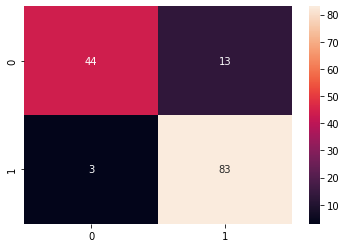

In [9]:
mat_SGD = confusion_matrix(y_test, SGDy_pred_test)

sns.heatmap(mat_SGD, annot=True)

In [21]:
# Gaussian Process Classifier
GP_model = GaussianProcessClassifier()
GP_model.fit(X_test, y_test)
GP_model.score(X_test, y_test)

GPy_pred_test = GP_model.predict(X_test)
GPy_train_pred = GP_model.predict(X_train)

In [22]:
GP_accuracy_train = accuracy_score(y_train, GPy_train_pred)
GP_accuracy_test = accuracy_score(y_test,GPy_pred_test)

print(GP_accuracy_train,GP_accuracy_test)

0.8708920187793427 1.0


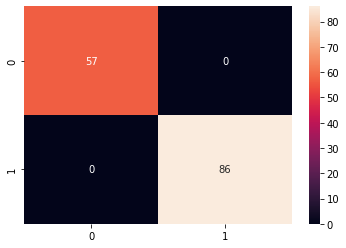

In [23]:
mat_GP = confusion_matrix(y_test, GPy_pred_test)

sns.heatmap(mat_GP, annot=True)

In [24]:
# Ridge Classifier
RC_model = RidgeClassifier()
RC_model.fit(X_test, y_test)
RC_model.score(X_test, y_test)

RCy_pred_test = RC_model.predict(X_test)
RCy_train_pred = RC_model.predict(X_train)


In [25]:
RC_accuracy_train = accuracy_score(y_train,RCy_train_pred)
RC_accuracy_test = accuracy_score(y_test,RCy_pred_test)

print(RC_accuracy_train,RC_accuracy_test)

0.9507042253521126 0.965034965034965


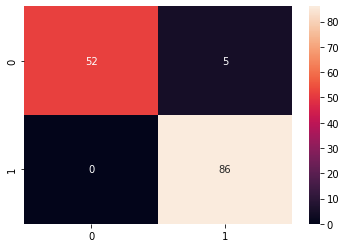

In [26]:
RC_mat = confusion_matrix(y_test, RCy_pred_test)

sns.heatmap(RC_mat, annot=True)